In [2]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [3]:
%%bash
cd .. && make clean && make

In file included from src/Exercice5_students.cpp:7:
src/ConfigFile.tpp:67:8: warning: variable 'out' is used uninitialized whenever 'if' condition is false [-Wsometimes-uninitialized]
   67 |   if ( val != configMap.end() ) {
      |        ^~~~~~~~~~~~~~~~~~~~~~
src/Exercice5_students.cpp:160:33: note: in instantiation of function template specialization 'ConfigFile::get<double>' requested here
  160 |         const double tfin = configFile.get<double>("tfin");
      |                                        ^
src/ConfigFile.tpp:74:10: note: uninitialized use occurs here
   74 |   return out;
      |          ^~~
src/ConfigFile.tpp:67:3: note: remove the 'if' if its condition is always true
   67 |   if ( val != configMap.end() ) {
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~
   68 |     std::istringstream iss(val->second);
   69 |     iss >> out;
   70 |     std::cout << "\t" << key << "=" << out << std::endl;
   71 |   }else{
      |    ~~~~~
   72 |     std::cerr << "[ConfigFile] Le para

In [4]:
config_name = 'corail3'
conf = load_conf(config_name)

In [5]:
# params, data_x, data_v, data_f
params, x, vitesse, f, h0 = run_with_params(
    config_name,
    [{}]
)[0]
t = f[:,0]
h = f[:,1:]

[ConfigFile] Ligne sans '=' : "# Physique :"


Running simulations... Done 1/1


# Plots!

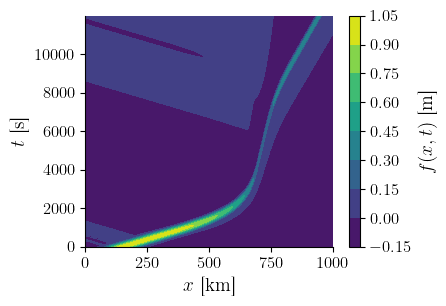

In [13]:
%matplotlib inline
X, Y = np.meshgrid(x/1e3, f[:,0])
plt.contourf(X, Y, f[:,1:], cmap=plt.get_cmap('viridis'))
plt.colorbar().set_label('$f(x,t)$ [m]')
plt.xlabel(r'$x$ [km]')
plt.ylabel(r'$t$ [s]')

plt.savefig(export_path + 'corail_eq2_mouvement_vague.png')

In [7]:
# Do your stuff here pwease
# %matplotlib qt
# import matplotlib.animation as mpla

# plt.figure(figsize=(8, 8))

# plt.fill_between(x, -h0, -conf['hL'], color='xkcd:sand')
# line, = plt.plot(x, f[0,1:], 'x-', markersize=5)
# size = f.shape[0]

# def animate(i) -> Any:
#     idx = i % size
#     line.set_data(x, f[idx,1:])

# anim = mpla.FuncAnimation(plt.gcf(), animate, interval=20, cache_frame_data=True, frames=size)

# plt.xlabel(r'$x$ [m]')
# plt.ylabel(r'$y$ [m]')
# plt.ylim(-10, 20)
# plt.grid()
# anim.save('yeet.gif')

In [27]:
%matplotlib inline
idx_x_max = np.argmax(h, axis=1)
sel_x = x[idx_x_max]

actual_t = np.copy(t)
amplitudes = np.zeros(len(t))
k = 1
for i in range(k, len(t)-k):
    coefs = np.polyfit(t[max(0,i-k):i+k+1], h[max(0,i-k):i+k+1, idx_x_max[i]], 2)
    fitfunc = np.poly1d(coefs)
    res = sc.optimize.minimize(lambda t: -fitfunc(t), 0, options={'disp': False})
    actual_t[i] = res.x[0]
    amplitudes[i] = -res.fun
amplitudes[0] = amplitudes[1]
amplitudes[-1] = amplitudes[-2]

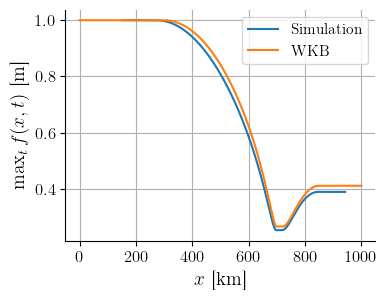

In [28]:
%matplotlib inline
plt.plot(x[idx_x_max]/1e3, amplitudes, label='Simulation')
# A0 * (g hL)**(1/4) = A => A0 = A/((g hL)**(1/4))
plt.plot(x/1e3, conf['A'] * (h0/conf['hL'])**(1/4), label='WKB')
plt.xlabel(r'$x$ [km]')
plt.ylabel(r'$\max_t f(x,t)$ [m]')
plt.legend()
plt.grid()
plt.savefig(export_path + 'corail_eq2_amplitude_wkb.pdf')

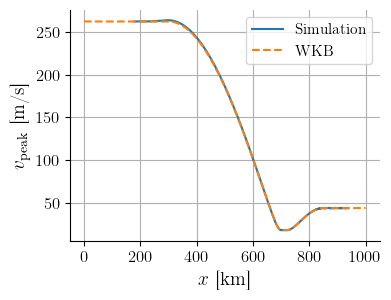

In [19]:
k = 10
# Spacial distance between spikes after some time delta given by calculated max
vcalc = (sel_x[2*k:] - sel_x[:-2*k]) / (actual_t[2*k:] - actual_t[:-2*k])
plt.plot(x[idx_x_max][k:-k]/1e3, vcalc, label='Simulation')
vth = np.sqrt(9.81 * h0)
plt.plot(x/1e3, vth, '--', label='WKB')
plt.xlabel(r'$x$ [km]')
plt.ylabel(r'$v_\textrm{peak}$ [m/s]')
plt.legend()
plt.grid()
plt.savefig(export_path + 'corail_eq2_vitesse_wkb.pdf')